D:\M1\anaconda\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


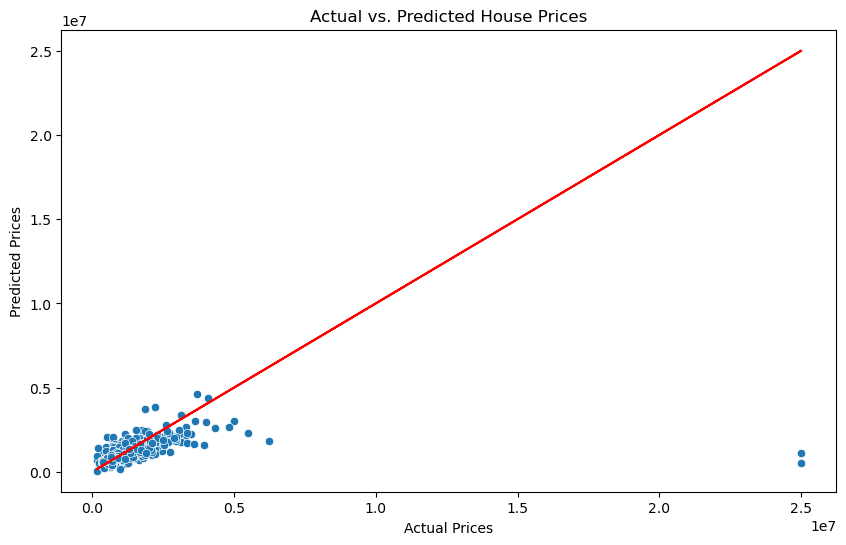

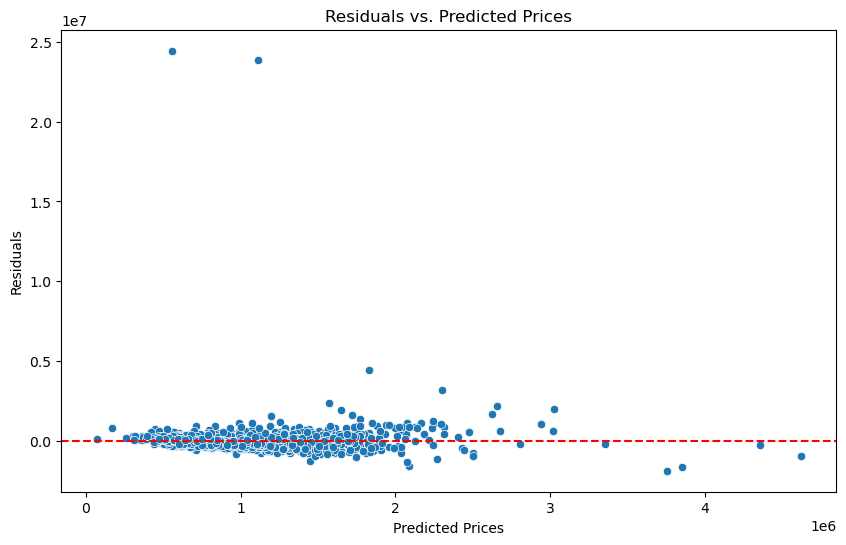

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'D:\\AI PROJECT\\train_clean.csv'  # Adjust this to your file path
data = pd.read_csv(file_path)

# Prepare the data
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Create and fit the GLM
model = sm.GLM(y, X, family=sm.families.Gaussian(link=sm.families.links.identity()))
results = model.fit()

# Generate predictions
predictions = results.predict(X)

# Plotting
# Actual vs. Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=predictions)
plt.plot(y, y, color='red')  # Line for perfect predictions
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()

# Residuals vs. Predicted
residuals = y - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

In [4]:
# Print all column names to identify the correct target variable
print(data.columns)


Index(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], dtype='object')


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming data is your DataFrame from the previous steps

# Handle missing values if necessary
# data.fillna(method='ffill', inplace=True)  # Example method, adjust as needed

# Encode categorical variables if present (adjust based on your dataset)
# data = pd.get_dummies(df, drop_first=True)

# Standardize the features
features = data.select_dtypes(include=[np.number])  # Selecting only numeric features for standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Note: If you plan to apply models that require a target variable (e.g., GLM), ensure to define your target before splitting the data
# Example for a supervised learning setup (optional at this stage):
# X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['YourTargetColumnName'], test_size=0.2, random_state=42)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'target' is the name of your target variable
# Make sure to replace 'target' with the actual name of your target column
X = features_scaled  # Features from the preprocessing step
y = data['beds']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GLM model
glm_model = LinearRegression()

# Fit the model
glm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = glm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 1.2224967943861764e-30
R^2 Score: 1.0


In [13]:
print(X_train.shape)
print(y_train.shape)


(1328, 0)
(1328, 6)


In [14]:
# Check for non-numeric types
print(X_train.dtypes)
print(y_train.dtypes)

# Check for NaN or infinite values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

Series([], dtype: object)
beds          int64
baths       float64
size        float64
lot_size    float64
zip_code      int64
price       float64
dtype: object
Series([], dtype: float64)
beds        0
baths       0
size        0
lot_size    0
zip_code    0
price       0
dtype: int64


In [15]:
X_train.fillna(X_train.median(), inplace=True)
y_train.fillna(y_train.median(), inplace=True)


In [16]:
# Assuming 'data' is your full DataFrame and contains both features and targets

# Correctly preparing features by dropping only the target columns
features = data.drop(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], axis=1)

# Ensure this results in a non-empty DataFrame
print(features.shape)

# If 'features' now contains the correct number of columns (greater than 0), proceed with splitting again
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

(1660, 0)


In [17]:
print(data.columns)


Index(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], dtype='object')


In [28]:
# Assuming 'data' now includes both features and targets

# Separate features and targets
features = data.drop(['price'], axis=1)
targets = data[['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price']]


# Now, features should not be empty, and you can proceed with training your model.

In [29]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("First few rows of X_train:\n", X_train.head())


X_train shape: (1328, 5)
y_train shape: (1328, 6)
First few rows of X_train:
      beds  baths    size  lot_size  zip_code
266     3    1.0  1090.0   13503.6     98178
148     4    2.0  2370.0    5000.0     98115
567     2    1.0   910.0    4800.0     98117
744     2    1.0   800.0    6946.0     98125
588     3    2.0  1548.0    1139.0     98117


In [23]:
# Defining the feature columns based on the dataset provided
features_columns = ['beds', 'baths', 'size', 'lot_size', 'zip_code']



In [24]:
# Assuming 'data' is your DataFrame loaded from the provided dataset
features = data[features_columns]
targets = data['price']

# Now, you can proceed with splitting the data into training and testing sets as needed.


In [34]:
# Assuming 'data' is your DataFrame and includes 'price' as one of the columns along with all the features
target = 'price'  # The column name for your target variable

# Extracting the target column for training and testing
y_train = data.loc[X_train.index, target]
y_test = data.loc[X_test.index, target]

# Add a constant to the feature sets to include an intercept in the model
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test)

# Fit a GLM for the target 'price' using all provided features
model = sm.GLM(y_train, X_train_with_const, family=sm.families.Gaussian())
results = model.fit()

# Display the summary of the model to inspect p-values, coefficients, etc.
print(results.summary())

# Predict on the testing set
y_pred = results.predict(X_test_with_const)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                 1328
Model:                            GLM   Df Residuals:                     1322
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                      5.8651e+11
Method:                          IRLS   Log-Likelihood:                -19874.
Date:                Fri, 01 Mar 2024   Deviance:                   7.7536e+14
Time:                        21:06:23   Pearson chi2:                 7.75e+14
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2716
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.031e+08   9.07e+07      3.342      0.0